# Practica 3. Regresión lineal con BGD
### Aprendizaje Máquina e Inteligencia Artificial
Francisco Pineda Hernández

In [13]:
# Librerías generales de uso
import pandas as pd
import numpy as np

## Batch Gradient Descent (BGD)

$$ w_i  = w_i - 2\alpha \sum_{i = 0}^{m - 1} (w_i x_{j, i} - y_i)x_{j, i} $$

In [14]:
def bgd(X, Y, W_inicial, alpha):
    W = []
    for i in range(X.shape[1]):
        aux2 = 0 
        for j in range(len(X)):  
            aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]
        aux = (W_inicial[i] - (2 * alpha * aux2))
        W.append(aux)
    return W

In [15]:
from sklearn.model_selection import train_test_split # Importamos el método para dividir el dataset


def aplicar_bgd_ajusteAplha(dataset, iteraciones, W, alpha, error_ideal=0.01):
    print("ESTE ES EL W ORIGINAL ", W)
    if len(W) != len(dataset.iloc[0]) - 1:
        print("Las dimensiones del vector W y del dataset no coinciden")
        return
    
    W_arreglo = []
    errores_arreglo = []
    error_actual = float('inf') 
    W_arreglo.append(W)
    indice_correcto = 0
    
    # Dividir el dataset
    columna_objetivo = list(dataset.columns)[-1]
    dataset_train, dataset_test = train_test_split(dataset, train_size=0.7, test_size=0.3, shuffle=True, random_state=0)
    X_train = dataset_train.drop(columns=[columna_objetivo]).values
    Y_train = dataset_train[columna_objetivo].values.reshape(-1, 1)
    
    for i in range(iteraciones):

        if error_actual <= error_ideal: # Identificar si ya se alcanzo un error deseado
            print(f"\n ========= ERROR ALCANZADO CON W ={W} :) ========= ")
            return W, W_arreglo, errores_arreglo

        print(f"\nITERACION {i}: W={W}, Alpha={alpha}")
        W = bgd(X_train, Y_train, W, alpha)
        suma_errores_iteracion = 0
        print(f"W nuevo = {W}")
        W_arreglo.append(W)

        # TEST's
        for j in range(len(dataset_test)):
            evaluacion = np.dot(dataset_test.iloc[j,:-1], W)
            error_test = abs(evaluacion - dataset_test[columna_objetivo].iloc[j])
            print(f"Test {i}| Y = {dataset_test[columna_objetivo].iloc[j]} ERROR=({error_test})")
            suma_errores_iteracion += error_test

        print(f"Suma total de errores = {suma_errores_iteracion}")

        if i == 0:
            error_actual = suma_errores_iteracion
            
        if suma_errores_iteracion < error_actual:
            error_actual = suma_errores_iteracion
            errores_arreglo.append(suma_errores_iteracion)
            indice_correcto += 1
        else:
            alpha /= 2
            W = W_arreglo[indice_correcto]
            #print(W_arreglo)
            print(f" ================================= Alpha disminuido a => {alpha}, W a usar = {W}")

    print(f" =========== FINALIZADO POR ITERACIONES, REGRESANDO W = {W} ===========")
    return W, W_arreglo, errores_arreglo

In [16]:
from sklearn.model_selection import train_test_split # Importamos el método para dividir el dataset


def aplicar_bgd(dataset, iteraciones, W, alpha, error_ideal=0.000001):
    print("ESTE ES EL W ORIGINAL ", W)
    if len(W) != len(dataset.iloc[0]) - 1:
        print("Las dimensiones del vector W y del dataset no coinciden")
        return
    
    W_arreglo = []
    errores_arreglo = []
    error_actual = float('inf') 
    W_arreglo.append(W)
    indice_correcto = 0
    
    # Dividir el dataset
    columna_objetivo = list(dataset.columns)[-1]
    dataset_train, dataset_test = train_test_split(dataset, train_size=0.7, test_size=0.3, shuffle=True, random_state=0)
    X_train = dataset_train.drop(columns=[columna_objetivo]).values
    Y_train = dataset_train[columna_objetivo].values.reshape(-1, 1)
    
    for i in range(iteraciones):

        if error_actual <= error_ideal: # Identificar si ya se alcanzo un error deseado
            print(f"\n ========= ERROR ALCANZADO CON W ={W} :) ========= ")
            return W, W_arreglo, errores_arreglo

        print(f"\nITERACION {i}: W={W}, Alpha={alpha}")
        W = bgd(X_train, Y_train, W, alpha)
        suma_errores_iteracion = 0
        W_arreglo.append(W)

        # TEST's
        for j in range(len(dataset_test)):
            evaluacion = np.dot(dataset_test.iloc[j,:-1], W)
            error_test = abs(evaluacion - dataset_test[columna_objetivo].iloc[j])
            print(f"Test {i+1}: Y_test = {dataset_test[columna_objetivo].iloc[j]} - Y_pred = {evaluacion} | ERROR = {error_test:.4f}")
            suma_errores_iteracion += error_test

        print(f"Suma total de errores = {suma_errores_iteracion}")

        if i == 0:
            error_actual = suma_errores_iteracion
            
        if suma_errores_iteracion < error_actual:
            error_actual = suma_errores_iteracion
        errores_arreglo.append(suma_errores_iteracion)

    print(f"\n\n =========== FINALIZADO POR ITERACIONES, REGRESANDO W = {W} ===========\n")
    return W, W_arreglo, errores_arreglo

## Programa 1

In [17]:
# Lectura dataset precio de viviendas programa 1
casas = pd.read_csv('casas.csv')
casas

,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


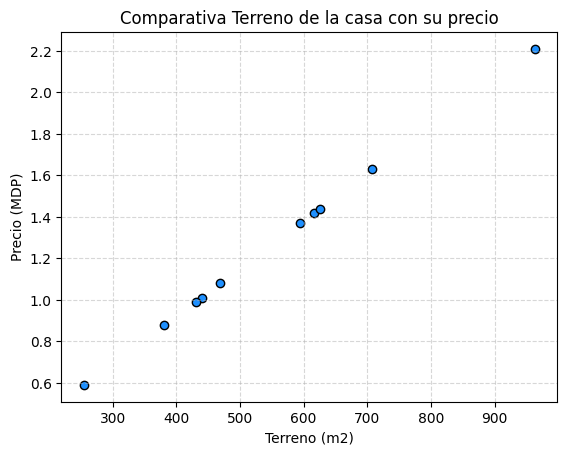

In [18]:
import matplotlib.pyplot as plt
# Graficar scatter
plt.scatter(casas['Terreno (m2)'], casas['Precio (MDP)'], color='dodgerblue', marker='o', edgecolor='black')

# Personalizar gráfico
plt.title('Comparativa Terreno de la casa con su precio')
plt.xlabel('Terreno (m2)')
plt.ylabel('Precio (MDP)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [26]:
W_final_casas, W_arreglo_casas, errores_arreglo_casas = aplicar_bgd(casas, 4, [0] * 1, 0.00000007)

ESTE ES EL W ORIGINAL  [0]

ITERACION 0: W=[0], Alpha=7e-08
Test 1: Y_test = 0.88 - Y_pred = 0.3102798468 | ERROR = 0.5697
Test 1: Y_test = 1.63 - Y_pred = 0.5765830223999999 | ERROR = 1.0534
Test 1: Y_test = 0.99 - Y_pred = 0.35099898679999997 | ERROR = 0.6390
Suma total de errores = 2.262138144

ITERACION 1: W=[0.0008143827999999999], Alpha=7e-08
Test 2: Y_test = 0.88 - Y_pred = 0.5107482737671498 | ERROR = 0.3693
Test 2: Y_test = 1.63 - Y_pred = 0.9491070284176958 | ERROR = 0.6809
Test 2: Y_test = 0.99 - Y_pred = 0.5777756062825239 | ERROR = 0.4122
Suma total de errores = 1.4623690915326304

ITERACION 2: W=[0.00134054665030748], Alpha=7e-08
Test 3: Y_test = 0.88 - Y_pred = 0.6402687393247715 | ERROR = 0.2397
Test 3: Y_test = 1.63 - Y_pred = 1.1897907281940636 | ERROR = 0.4402
Test 3: Y_test = 0.99 - Y_pred = 0.7242935082650301 | ERROR = 0.2657
Suma total de errores = 0.9456470242161347

ITERACION 3: W=[0.0016804953788051745], Alpha=7e-08
Test 4: Y_test = 0.88 - Y_pred = 0.7239505003

C:\Users\packo\AppData\Local\Temp\ipykernel_16188\140937067.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]


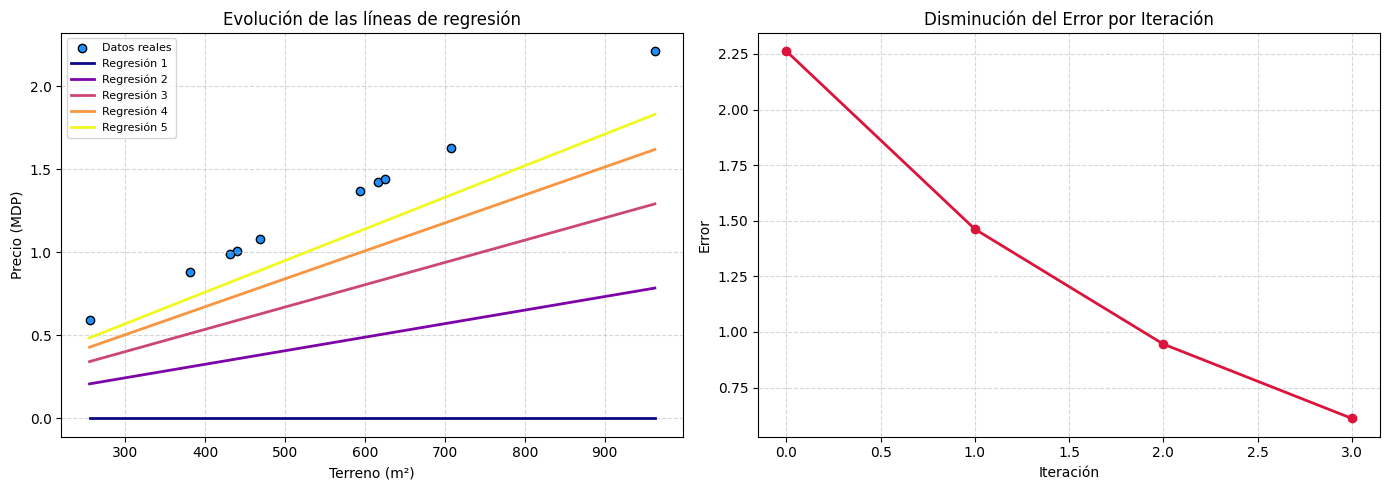

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Crear valores de X para la línea
x_vals = np.linspace(casas['Terreno (m2)'].min(), casas['Terreno (m2)'].max(), 100)

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Gráfico 1: líneas de regresión ---
# Graficar puntos reales
axs[0].scatter(casas['Terreno (m2)'], casas['Precio (MDP)'],
               color='dodgerblue', edgecolor='black', label='Datos reales')

# Colores degradados para mostrar evolución
colors = cm.plasma(np.linspace(0, 1, len(W_arreglo_casas)))

for i, (W, color) in enumerate(zip(W_arreglo_casas, colors)):
    W = np.ravel(W)
    if len(W) == 1:
        y_vals = W[0] * x_vals
    else:
        y_vals = W[0] + W[1] * x_vals
    axs[0].plot(x_vals, y_vals, color=color, linewidth=2, label=f'Regresión {i+1}')

axs[0].set_title('Evolución de las líneas de regresión')
axs[0].set_xlabel('Terreno (m²)')
axs[0].set_ylabel('Precio (MDP)')
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend(fontsize=8)

# --- Gráfico 2: evolución del error ---
axs[1].plot(range(len(errores_arreglo_casas)), errores_arreglo_casas,
            color='crimson', marker='o', linewidth=2)
axs[1].set_title('Disminución del Error por Iteración')
axs[1].set_xlabel('Iteración')
axs[1].set_ylabel('Error')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [21]:
multivariable = pd.read_csv('Dataset_multivariable.csv')
multivariable

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


In [31]:
W_final_multivariable, W_arreglo_multivariable, errores_arreglo_multivariable = aplicar_bgd(multivariable, 4, [0.0, 0.0, 0.0, 0.0, 0.0], 0.000006)

ESTE ES EL W ORIGINAL  [0.0, 0.0, 0.0, 0.0, 0.0]

ITERACION 0: W=[0.0, 0.0, 0.0, 0.0, 0.0], Alpha=6e-06
Test 1: Y_test = 17.4 - Y_pred = 3.002626128 | ERROR = 14.3974
Test 1: Y_test = 34.8 - Y_pred = 6.147369192 | ERROR = 28.6526
Test 1: Y_test = 23.2 - Y_pred = 4.050873816 | ERROR = 19.1491
Suma total de errores = 62.199130864

ITERACION 1: W=[0.0020532, 0.0030832800000000007, -0.0585684, 0.0698784, 0.040169640000000006], Alpha=6e-06
Test 2: Y_test = 17.4 - Y_pred = 5.8049976378882855 | ERROR = 11.5950
Test 2: Y_test = 34.8 - Y_pred = 11.873986734371123 | ERROR = 22.9260
Test 2: Y_test = 23.2 - Y_pred = 7.827994003382565 | ERROR = 15.3720
Suma total de errores = 49.89302162435803

ITERACION 2: W=[0.004106227531199999, 0.006166037569036801, -0.1135882577808, 0.13371930624, 0.07918998642996], Alpha=6e-06
Test 3: Y_test = 17.4 - Y_pred = 8.421864503496344 | ERROR = 8.9781
Test 3: Y_test = 34.8 - Y_pred = 17.21132733235039 | ERROR = 17.5887
Test 3: Y_test = 23.2 - Y_pred = 11.351685446447

C:\Users\packo\AppData\Local\Temp\ipykernel_16188\140937067.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]


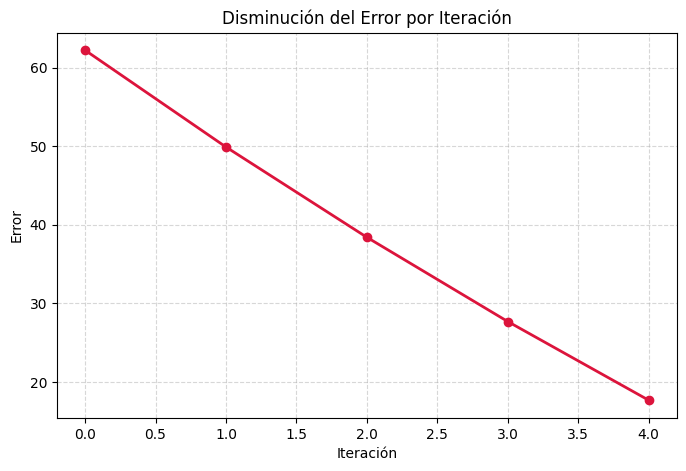

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir a numpy por si acaso
errores = np.array(errores_arreglo_multivariable, dtype=float).flatten()

# Crear la figura
plt.figure(figsize=(8, 5))
plt.plot(range(len(errores)), errores, marker='o', color='crimson', linewidth=2)
plt.title('Disminución del Error por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()